In [ ]:
# ==========================================
#  Support Vector Machine (SVM) Model
# ==========================================

# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ------------------------------------------
# 1. Load Dataset
# ------------------------------------------
data = pd.read_csv("final_preprocessed.csv")

# Display basic info
print("Dataset shape:", data.shape)
print(data.head())

Dataset shape: (1829, 11)
   Id  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0   1     0.461538  0.679739       0.466667       0.740741  0.623984   
1   2     0.076923  0.267974       0.366667       0.518519  0.623984   
2   3     0.615385  0.908497       0.333333       0.529246  0.623984   
3   4     0.076923  0.294118       0.366667       0.296296  0.177778   
4   6     0.384615  0.470588       0.500000       0.529246  0.623984   

        BMI  DiabetesPedigreeFunction       Age  Outcome Age_Binned  
0  0.490446                  0.493261  0.674419        1       0-20  
1  0.267516                  0.245283  0.232558        0       0-20  
2  0.162420                  0.533693  0.255814        1       0-20  
3  0.315287                  0.079964  0.000000        0        NaN  
4  0.235669                  0.110512  0.209302        0       0-20  


In [ ]:
# ------------------------------------------
# 2. Split Features and Target
# ------------------------------------------
X = data.drop(columns=['Outcome', 'Age_Binned', 'Id'])   # Drop 'Outcome', 'Age_Binned', and 'Id' columns
y = data['Outcome']

In [ ]:
# ------------------------------------------
# 3. Split Train-Test Data
# ------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# ------------------------------------------
# 4. Feature Scaling
# ------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# ------------------------------------------
# 5. Define and Train SVM Model
# ------------------------------------------
svm_model = SVC(kernel='linear', random_state=42) # Using a linear kernel as a starting point
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

Accuracy: 0.7786885245901639
Precision: 0.7368421052631579
Recall: 0.5555555555555556
F1 Score: 0.6334841628959276

Confusion Matrix:
 [[215  25]
 [ 56  70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       240
           1       0.74      0.56      0.63       126

    accuracy                           0.78       366
   macro avg       0.77      0.73      0.74       366
weighted avg       0.77      0.78      0.77       366



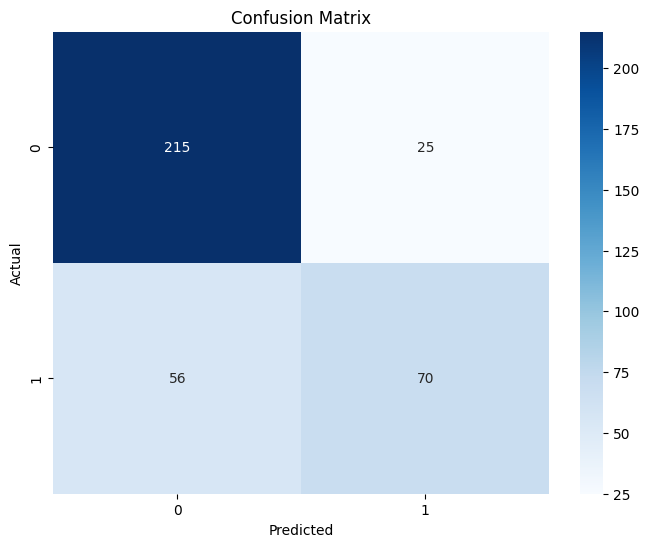

In [ ]:
# ------------------------------------------
# 6. Evaluate the Model
# ------------------------------------------
y_pred = svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# ------------------------------------------
# 7. Hyperparameter Tuning (GridSearchCV)
# ------------------------------------------
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print("\nBest Parameters from GridSearchCV:")
print(grid.best_params_)

# Best model
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)


Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters from GridSearchCV:
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}



Tuned Model Evaluation:
Accuracy: 0.9754098360655737
Precision: 0.9915966386554622
Recall: 0.9365079365079365
F1 Score: 0.963265306122449

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       240
           1       0.99      0.94      0.96       126

    accuracy                           0.98       366
   macro avg       0.98      0.97      0.97       366
weighted avg       0.98      0.98      0.98       366



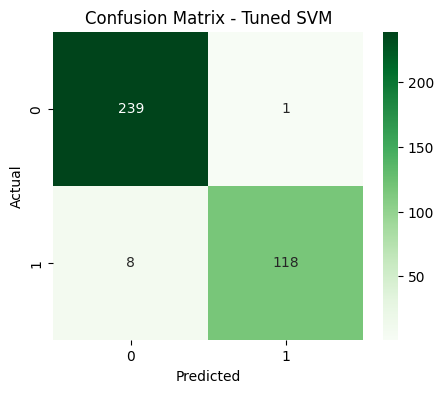

In [ ]:
# ------------------------------------------
# 8. Evaluate Tuned Model
# ------------------------------------------
print("\nTuned Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix - Tuned SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# ------------------------------------------
# 9. Cross Validation
# ------------------------------------------
cv_scores = cross_val_score(best_svm, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.94535519 0.98087432 0.97814208 0.97540984 0.98356164]
Mean CV Accuracy: 0.9726686129201287
